# 1.数据读入

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import jieba
from wordcloud import WordCloud
import re
import collections
from tqdm import tqdm

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

df = pd.read_csv('HotPotForMac.csv')
df

,ID,字段1,字段2,discount,price,privilege.for.new,privilege.on.sale,district,if.nonworkdays.available,time.duration,...,quarterly.sales.volume,level.of.participants.limited,level.of.tickets.limited,place,food,taste,cook,people,style,HighFreq
0,1,巴蜀大魏道火锅(高新路店),仅售308元，价值372元6人餐！免费WiFi节假日通用，可使用包间！,0.827957,308.0,钱包新客最高再减20元,无立减优惠,高新区,周末法定节假日通用,24.0,...,5.416667,不限人数,不限张数,是,否,否,否,否,川系,2
1,10,宽窄巷子火锅,仅售79.9元，价值100元代金券！可使用包间，免费停车，免费WiFi！,0.799000,79.9,钱包新客最高再减20元,无立减优惠,高新区,周末法定节假日通用,12.0,...,1874.198473,不限人数,不限张数,否,否,否,否,否,川系,1
2,100,重庆鼻祖老火锅,仅售90元，价值100元代金券！可叠加使用，免费WiFi，可使用包间，免费WiFi！,0.900000,90.0,钱包新客最高再减20元,无立减优惠,雁塔区,非周末法定节假日通用,11.0,...,466.758621,不限人数,不限张数,是,否,否,否,否,川系,3
3,1000,六婆串串香火锅(凤城一路店),仅售1元，价值12元凤城一路店大签30个！节假日通用，提供免费WiFi，免费WiFi！,0.083333,1.0,钱包新客最高再减20元,无立减优惠,未央区,周末法定节假日通用,10.0,...,2.241993,不限人数,不限张数,否,否,是,否,是,川系,4
4,1001,辣尚仙焖锅,仅售68元，最高价值128元咸宁中路店双人菌类套餐！?,0.531250,68.0,钱包新客最高再减20元,无立减优惠,新城区,非周末法定节假日通用,11.0,...,6.443418,限2-4人,不限张数,否,否,是,是,否,川系,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,993,香辣e族,仅售58元，价值78元双人餐！免费WiFi！,0.743590,58.0,钱包新客最高再减20元,无立减优惠,莲湖区,周末法定节假日通用,11.5,...,9.818182,限2-4人,不限张数,否,否,是,否,否,川系,2
2684,995,小芭蕉泰式火锅(李家村万达店),仅售69元，价值100元李家村万达店代金券！免费WiFi！,0.690000,69.0,钱包新客最高再减20元,无立减优惠,碑林区,周末法定节假日通用,12.0,...,0.000000,不限人数,不限张数,否,否,否,否,否,其他,2
2685,996,清真古城好一锅羊蝎子火锅,仅售133元，最高价值201元4-6人餐！节假日通用，提供免费WiFi、停车位，免费停车，免...,0.661692,133.0,钱包新客最高再减20元,无立减优惠,碑林区,周末法定节假日通用,12.5,...,3.322148,限5-12人,不限张数,否,是,是,否,否,北系,2
2686,998,Kiumi韩式年糕火锅,仅售88元，价值108元4人年糕火锅套餐！节假日通用，店内提供免费WiFi，免费WiFi！,0.814815,88.0,钱包新客最高再减20元,无立减优惠,长安区,周末法定节假日通用,12.0,...,3.203883,不限人数,不限张数,是,是,否,否,否,其他,1


数据清洗的部分在下面根据每种需求进行

# 2.直方图

由于季均销量存在200多个样本点为0，所以在取对数的时候，需要对所有样本共同添加一个较小的正数（这里取$10^{-4}$）

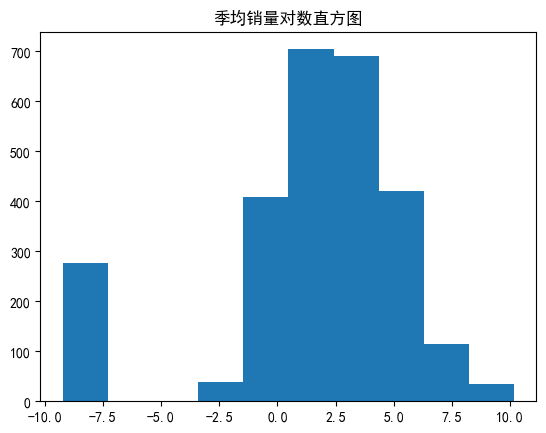

In [2]:
df['季均销量对数'] = np.log(df['quarterly.sales.volume'] + 10 ** -4) # 对为0的值稍微增加
plt.hist(df['季均销量对数'])
plt.title('季均销量对数直方图')
plt.show()

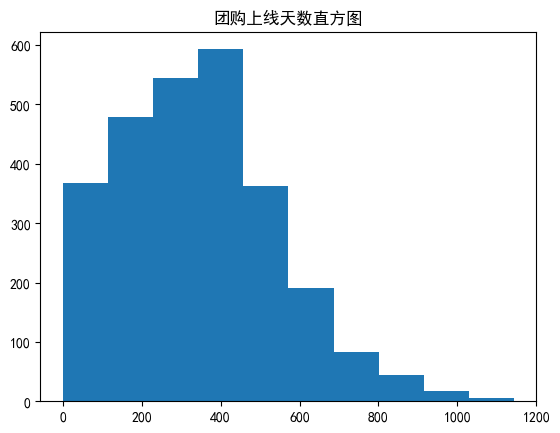

In [3]:
plt.hist(df['online.intervel'])
plt.title('团购上线天数直方图')
plt.show()

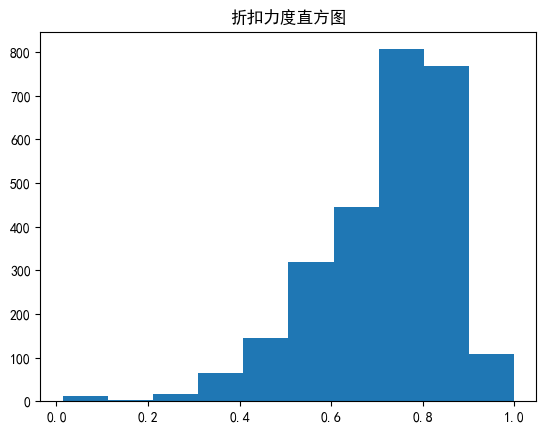

In [4]:
plt.hist(df['discount'])
plt.title('折扣力度直方图')
plt.show()

分析：从对数季均销量、团购上线天数和折扣力度三者的直方图中可以看出。对数季均销量分布除了有接近300个样本点销量为0，比较特殊之外，其偏度接近0，左右两侧较为对称。而团购上线天数的分布具有明显的向右拖尾的右偏分布；反之折扣力度的分布具有明显的向左拖尾的左偏分布。

# 3.火锅店名称分析

制作商家店名词云时，使用正则表达式去掉一些停用词“小、区、路、小区、分店、店、（、）、火锅、锅、·”，还要去除字母和数字。

词频统计前30高频词汇如下：

In [5]:
names = list(df['字段1'])
cut_names = ' '.join(jieba.cut(' '.join(names)))
# stop_words = ['区','路','小区','分店','店','(',')','火锅']
stop_word_pattern = "区|路|小区|分店|店|\(|\)|火锅|[a-zA-Z0-9]|小|·|锅"
name_all = re.sub(stop_word_pattern, '', cut_names)
list_name_all = name_all.split(' ')
l1 = list()
for item in list_name_all:
    if item!= '':
        l1.append(item)
name_freq = pd.Series(l1).value_counts()
name_freq[0:30]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\86153\AppData\Local\Temp\jieba.cache
Loading model cost 0.288 seconds.
Prefix dict has been built successfully.


串串     244
重庆     222
涮      184
老      154
串串香    150
私房     137
鱼      133
自助     125
焖      115
煲       77
鸡公      70
肥牛      61
北京      61
主题      56
清真      48
村       48
城       47
凤城      47
坊       45
居       45
三汁      45
七婆      44
成都      44
鸡       42
泰式      41
和       40
一品      39
炝       38
铜       37
寨       37
dtype: int64

根据词汇和词频生成词云如下：

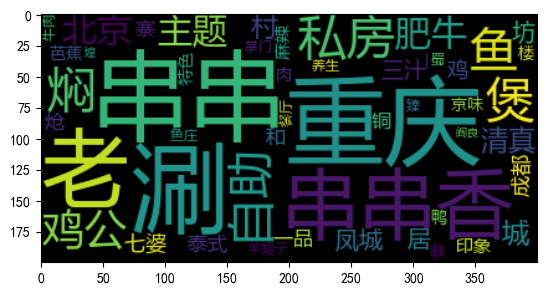

In [6]:
wc = WordCloud(font_path='msyh.ttc').generate(' '.join(list(name_freq[0:50].keys()))) # 需要在目录下有中文字体文件'msyh.ttc'
plt.imshow(wc, interpolation='bilinear')
plt.show()

分析：从词云中可以看出自助、串串、串串香、私房、鸡公煲、重庆、北京是在火锅店名称中高频出现的词汇。尤其是重庆、串串、串串香、涮的次数出现尤为多，可见重庆美食的店铺数量较多。也可以看出这些西安的火锅店很多都会和其他菜品联动，比如说串、鸡公煲、私房菜。也可以看出北京和重庆风味的火锅在这些店中比较常见。

# 4.箱线图1

销量和团购价的关系

首先看一下团购价（字段price）的分布情况：

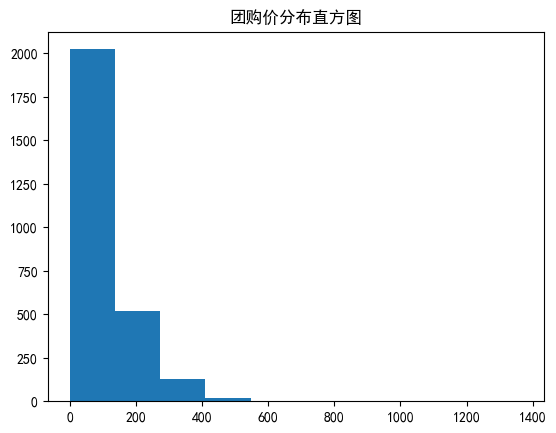

In [7]:
plt.hist(df['price'])
plt.title('团购价分布直方图')
plt.show()

可以划分为五种区间的价格：0-50，50-100，100-200，200-400，400及以上

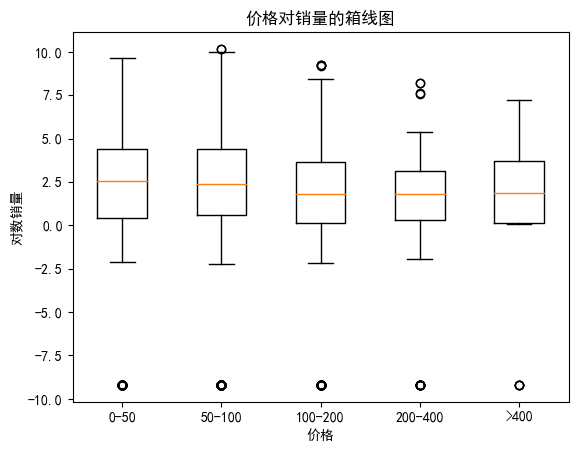

In [8]:
cname = '季均销量对数'
vol1 = df[df['price'] < 50][cname]
vol2 = df[(df['price'] > 50) & (df['price'] < 100)][cname]
vol3 = df[(df['price'] > 100) & (df['price'] < 200)][cname]
vol4 = df[(df['price'] > 200) & (df['price'] < 400)][cname]
vol5 = df[df['price'] > 400][cname]
ax = plt.subplot()
ax.boxplot([vol1, vol2, vol3, vol4, vol5])
ax.set_xticklabels(['0-50','50-100','100-200','200-400','>400'])
plt.xlabel('价格')
plt.ylabel('对数销量')
plt.title('价格对销量的箱线图')
plt.show()

分析：总体来说价格较低时销量偏高，尤其是在100以内销量较高，但是价格在200以上时，销量也会出现少量增高这样违背常识的现象发生。

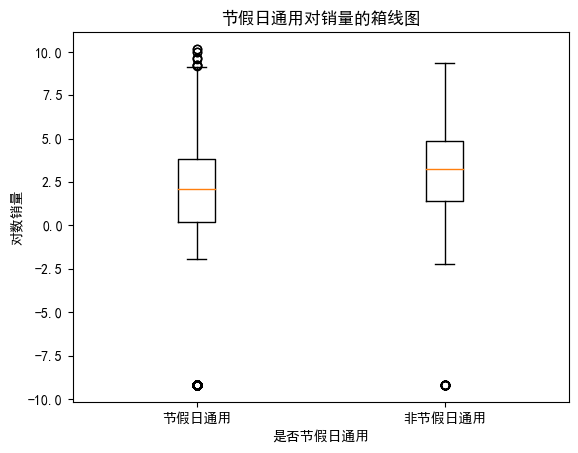

In [9]:
vol6 = df[df['if.nonworkdays.available'] == '周末法定节假日通用']['季均销量对数']
vol7 = df[df['if.nonworkdays.available'] == '非周末法定节假日通用']['季均销量对数']
ax = plt.subplot()
ax.boxplot([vol6, vol7])
ax.set_xticklabels(['节假日通用','非节假日通用'])
plt.xlabel('是否节假日通用')
plt.ylabel('对数销量')
plt.title('节假日通用对销量的箱线图')
plt.show()

分析：非节假日通用比节假日通用的销量略高一些。

# 5.火锅店名对销量的影响

可以对排在前15的高频词汇的销量,以及不含这些词汇的销量（其他）做箱线图进行对比

In [10]:
type_name = list(name_freq[0:15].keys())
type_name

['串串',
 '重庆',
 '涮',
 '老',
 '串串香',
 '私房',
 '鱼',
 '自助',
 '焖',
 '煲',
 '鸡公',
 '肥牛',
 '北京',
 '主题',
 '清真']

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 88.98it/s]


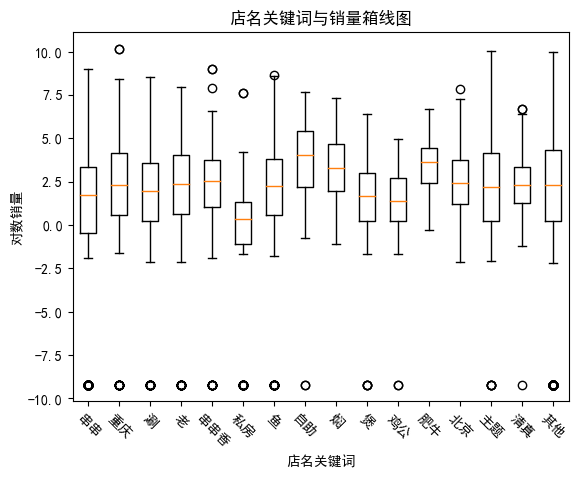

In [11]:
vol_list = list()
for name in tqdm(type_name):
    name_vol_list = list()
    for index in df.index:
        if name in df.loc[index, '字段1']:
            name_vol_list.append(df.loc[index, '季均销量对数'])
    vol_list.append(name_vol_list)

name_vol_list = list() # 其他
for index in df.index:
    if_find_target = False
    for name in type_name:
        if name in df.loc[index, '字段1']:
            if_find_target = True
            break
    if not if_find_target:
        name_vol_list.append(df.loc[index, '季均销量对数'])
vol_list.append(name_vol_list)

ax = plt.subplot()
ax.boxplot(vol_list)
ax.set_xticklabels(type_name + ['其他'])
plt.xlabel('店名关键词')
plt.xticks(rotation = -45)
plt.ylabel('对数销量')
plt.title('店名关键词与销量箱线图')
plt.show()

可以看到在诸多关键词当中，私房类、鸡公煲类、涮串类的火锅销量较为惨淡，虽然店面较多但是并没有想象中那么受到大众欢迎。含肥牛、焖、自助火锅类字样的火锅销量较好。